In [1]:

using SparseArrays
using LinearAlgebra
using CSV
using Plots

include("src/problems/standardLP.jl")
include("src/algorithms/utils/exitcriterion.jl")
include("src/algorithms/utils/results.jl")
include("src/algorithms/utils/helper.jl")
include("src/problems/dro/utils/libsvm_parser.jl")
include("src/problems/dro/wasserstein.jl")
include("src/algorithms/iclr_lazy_restart.jl")
include("src/algorithms/spdhg_restart.jl")
include("src/algorithms/pure_cd_restart.jl")
include("src/algorithms/pdhg_restart.jl")


pdhg_restart_x_y (generic function with 1 method)

In [2]:
function csv_to_results(filepath)
    csv_reader = CSV.File(filepath)

    results = Results()
    for row in csv_reader
        logresult!(results, row.iterations, row.times, row.fvalues, row.constraintnorms)
    end
    return results
end

csv_to_results (generic function with 1 method)

In [3]:
results_a9a_1 = csv_to_results("./run_results/2021-10-05_19-43-51-a9a-iclr_lazy_restart_x_y-blocksize5-R5.csv")
results_a9a_2 = csv_to_results("./run_results/2021-10-05_19-43-57-a9a-pdhg_restart_x_y-L175.92000000000002.csv")
results_a9a_3 = csv_to_results("./run_results/2021-10-05_19-44-01-a9a-spdhg_restart_x_y-blocksize100-R10.0.csv")
results_a9a_4 = csv_to_results("./run_results/2021-10-05_19-44-04-a9a-pure_cd_restart_x_y-blocksize5-R(purecd_R).csv")




Results([1, 97925, 195850, 293775, 293775, 391700, 489625, 587550, 685475, 685475  …  290543475, 290641400, 290739325, 290837250, 290935175, 291033100, 291131025, 291228950, 291326875, 291424800], [0.0, 1.116528034210205, 1.9297211170196533, 2.738651990890503, 2.758916139602661, 3.6106369495391846, 4.455420970916748, 5.310583114624023, 6.175428152084351, 6.193196058273315  …  3584.545524120331, 3586.29332113266, 3588.095589160919, 3589.921093940735, 3591.7006001472473, 3593.553312063217, 3595.4043140411377, 3597.232987165451, 3599.1107320785522, 3600.9723570346832], [0.0, 0.21829907565946718, 0.3763761098541233, 0.49256559477726847, 0.24628279738863423, 0.604835437503745, 0.6857916495519291, 0.7455281560413917, 0.7902107956272763, 0.3951053978136381  …  1.155950878942669, 1.1559724171742862, 1.1559939448088583, 1.1560154616430602, 1.1560369682445182, 1.1560584643211227, 1.1560799497159344, 1.1561014244471393, 1.1561228883353858, 1.1561443417050425], [183.45901195071903, 134.61190851220

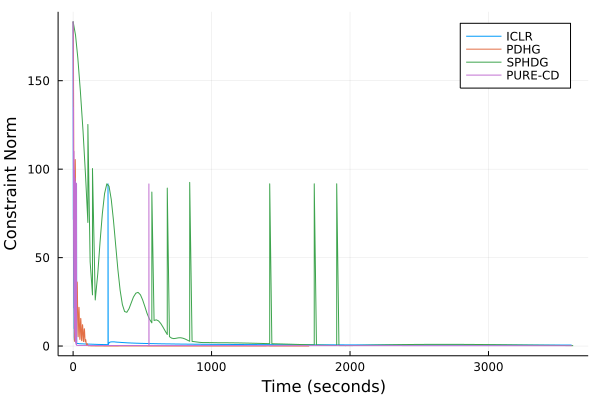

In [6]:


plot(results_a9a_1.times, results_a9a_1.constraintnorms, label="ICLR", # xlim=[0, 230], 
    xlabel="Time (seconds)", ylabel="Constraint Norm")
plot!(results_a9a_2.times, results_a9a_2.constraintnorms, label="PDHG")
plot!(results_a9a_3.times, results_a9a_3.constraintnorms, label="SPHDG")
plot!(results_a9a_4.times, results_a9a_4.constraintnorms, label="PURE-CD")



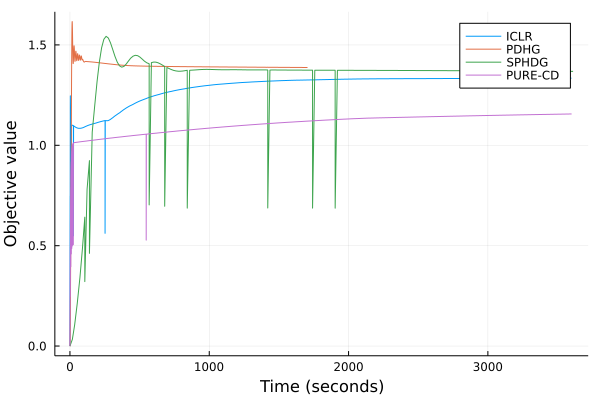

In [7]:


plot(results_a9a_1.times, results_a9a_1.fvalues, label="ICLR", # xlim=[0, 230], 
    xlabel="Time (seconds)", ylabel="Objective value")
plot!(results_a9a_2.times, results_a9a_2.fvalues, label="PDHG")
plot!(results_a9a_3.times, results_a9a_3.fvalues, label="SPHDG")
plot!(results_a9a_4.times, results_a9a_4.fvalues, label="PURE-CD")

